# Análise Exploratória dos Dados

Nesta parte inicial exploraremos os dados disponíveis, buscando alguns insights que podem ser úteis para a etapa de modelagem. 

__Setup e checagem inicial__

Carregamos todas as bibliotecas que serão utilizadas ao longo dessa etapa, bem como setamos o padrão dos gráficos para o default do seaborn. E também a importação do arquivo. No arquivo "train.csv", temos os dados com nomes de variáveis, porém, os preços não estão listados. O arquivo "test.csv", por sua vez, é destinado apenas à submissão de previsões para os participantes da competição. Portanto, para este exercício, iremos focar exclusivamente no arquivo "train.csv" como nossa única fonte de dados. 

In [89]:
import pandas as pd
import numpy as np
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')


# Salva o caminho do arquivo em uma variável para acesso mais fácil
caminho_arquivo_house = Path.cwd()

# Define o caminho relativo para a pasta de dados
pasta_dados = caminho_arquivo_house / "Data Houses" / "train.csv"

# Define o caminho relativo para a pasta de dados
pasta_dados_2 = caminho_arquivo_house / "Data Houses" / "test.csv"

# Lê os dados de treinamento e armazena-os em um DataFrame chamado house_data_train
house_data_train = pd.read_csv(pasta_dados)

# Lê os dados de teste e armazene-os em um DataFrame chamado house_data_test
house_data_test = pd.read_csv(pasta_dados_2)

# Olhando os primeiros elementos
house_data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [90]:
# Podemos excluir a variável ID, já que é redundante no nosso data frame
house_data_train = house_data_train.drop("Id", axis = 1)

In [91]:
# informações sobre a base de dados
house_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

Aproveitando para ver quais colunas possuem valores faltantes:

In [92]:
house_data_train.columns[house_data_train.isna().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

O conjunto de dados possui 80 variáveis preditoras, também conhecidas como features. Essas features são usadas para prever a variável de resposta, que é o preço de venda ('SalePrice'), que é a variável de interesse.


Features numéricos contínuos que se referem a dimensões / área (em pés / pés quadrados) (18):
- 'LotFrontage': Pés lineares da rua conectados à propriedade;
- 'LotArea': Área do lote;
- 'MasVnrArea': Área de alvenaria;
- 'BsmtFinSF1': Área acabada do porão (do primeiro tipo);
- 'BsmtFinSF2': Área acabada do porão (do segundo tipo, se mais de um);
- 'BsmtUnfSF': Área não acabada do porão;
- 'TotalBsmtSF': Área total do porão;
- '1stFlrSF': Área do primeiro andar;
- '2ndFlrSF': Área do segundo andar;
- 'LowQualFinSF': Área com acabamento de baixa qualidade (todos os andares);
- 'GrLivArea': Área útil acima do nível solo;
- 'GarageArea': Área da garagem;
- 'WoodDeckSF': Área do deck de madeira;
- 'OpenPorchSF': Área de varanda aberta;
- 'EnclosedPorch': Área de varanda fechada;
- '3SsnPorch': Área da varanda de três temporadas;
- 'ScreenPorch': Área da tela da varanda;
- 'PoolArea': Área da piscina;

Features numéricos contínuos de valores monetários (1):
- 'MiscVal': Valor monetário de características diversas não incluídas em outras categorias;

Features numéricos discretos de quantidades de alguma característica da casa (9):
- 'BsmtFullBath': Banheiros completos no porão;
- 'BsmtHalfBath': Lavabos no porão;
- 'FullBath': Banheiros completos acima do nível do solo;
- 'HalfBath': Lavabos completos acima do nível do solo;
- 'BedroomAbvGr': Quartos acima do nível do solo (não inclui quartos no subsolo);
- 'KitchenAbvGr': Cozinhas acima do nível do solo;
- 'TotRmsAbvGrd': Total de cômodos acima do nível do solo (não inclui banheiros);
- 'Fireplaces': Número de lareiras;
- 'GarageCars': Capacidade da garagem (número de carros);

Features numéricos discretos relacionados a datas (5) (exceção para 'GarageYrBlt', que possui valores contínuos):
- 'YearBuilt': Ano de construção da casa;
- 'YearRemodAdd': Ano da reforma da casa (mesma do ano da construção de não houver);
- 'GarageYrBlt': Ano de construção da garagem;
- 'MoSold': Mês de venda;
- 'YrSold': Ano de venda;

Features categóricos ordinais (22):
- 'LotShape': Formato geral do lote (regular, ligeiramente irregular, moderadamente irregular, irregular);
- 'Utilities': Utilidades disponíveis (de apenas eletricidade a todas);
- 'LandSlope': Inclinação do terreno (3 níveis);
- 'OverallQual': Qualidade geral da casa (de 0 a 10);
- 'OverallCond': Condições gerais da cada (de 0 a 10);
- 'ExterQual': Qualidade do material no exterior (5 níveis);
- 'ExterCond': Avaliação a condição atual do material no exterior (5 níveis);
- 'BsmtQual': Avaliação a altura do porão (5 níveis);
- 'BsmtCond': Avaliação do estado geral do porão (5 níveis);
- 'BsmtFinType1': Classificação da área acabada do porão (6 níveis + NA);
- 'BsmtFinType2': Classificação da área acabada do porão (para o segundo tipo, se mais de um) (6 níveis + NA);
- 'BsmtExposure': Avaliação da exposição externa do porão;
- 'HeatingQC': Qualidade e condição do aquecimento (5 níveis);
- 'KitchenQual': Qualidade da cozinha (5 níveis);
- 'Functional': Funcionalidade inicial (presuma típica, a menos que as deduções sejam garantidas) (8 níveis);
- 'FireplaceQu': Qualidade da lareira (5 níveis + NA);
- 'GarageFinish': Estado do acabamento interior da garagem (acabado, mal acabado, não acabado, sem garagem, NA);
- 'GarageQual': Qualidade da garagem (5 níveis + NA);
- 'GarageCond': Condição da garagem (5 níveis + NA);
- 'PavedDrive': Pavimento da pista até a garagem (pavimentado, parcialmente pavimentado, sem pavimento/cascalho);
- 'PoolQC': Qualidade da piscina (4 níveis + NA);
- 'Fence': Qualidade da cerca (4 níveis + NA);

Features categóricos nominais (24):
- 'Street': Tipo de estrada de acesso à propriedade (pavimentada ou de cascalho);
- 'Alley': Tipo de acesso à propriedade (pavimentada, de cascalho ou NA);
- 'MSSubClass': Classificação do tipo de imóvel;
- 'MSZoning': Classificação geral do zoneamento (Comercial, Agricultural, Residencial de média densidade, etc);
- 'LandContour': Tipo de nivelamento do terreno da propriedade;
- 'LotConfig': Configuração do lote (ex: esquina, dentro do lote, etc.);
- 'Neighborhood': Bairro;
- 'Condition1': Proximidade a alguma via específica (ex: Adjacente à Ferrovia Norte-Sul);
- 'Condition2': Idem a anterior, se mais de uma;
- 'BldgType': Tipo de moradia (ex: duplex, unidade interna da casa geminada, etc.);
- 'HouseStyle': Estilo de moradia (ex: casa térrea, sobrado, etc.). Semelhante a MSSubClass, mas menos detalhado;
- 'RoofStyle': Tipo de telhado;
- 'RoofMatl': Material do telhado;
- 'Exterior1st': Tipo de acabamento exterior;
- 'Exterior2nd': Idem a anterior, se mais de um;
- 'MasVnrType': Tipo da cobertura da alvenaria;
- 'Foundation': Tipo de fundação;
- 'Heating': Tipo de aquecimento;
- 'CentralAir': Ar condicionado central (sim ou não);
- 'Electrical': Sistema elétrico;
- 'GarageType': Localização da garagem em relação a casa;
- 'MiscFeature': Características diversas não incluídas em outras categorias;
- 'SaleType': Tipo de venda (tipo de garantia, tipo de contrato);
- 'SaleCondition': Condição de venda (ex: normal, venda entre membros de família, etc.).

# Analisando Sales Price

O preço de venda é a razão do nosso exercício. É importante analisar algumas estatísticas dessa variável plotando a distribuição de preço. 

In [93]:
# Resumo estatística da variável Sale Price
house_data_train["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [94]:
# Verificar se há valores ausentes em "SalePrice"
has_missing_values = house_data_train['SalePrice'].isna().any()

# Imprimir o resultado
if has_missing_values:
    print("Existem valores ausentes em 'SalePrice'.")
else:
    print("Não há valores ausentes em 'SalePrice'.")

Não há valores ausentes em 'SalePrice'.


Plotamos a distribuição do preço de venda das casas e verificamos as  medidas de assimetria e de curtose:

In [95]:
# Verificar a assimetria
print(f"Assimetria: {house_data_train['SalePrice'].skew()}")

# Verificar a curtose
print(f"Curtose: {house_data_train['SalePrice'].kurt()}")


Assimetria: 1.8828757597682129
Curtose: 6.536281860064529


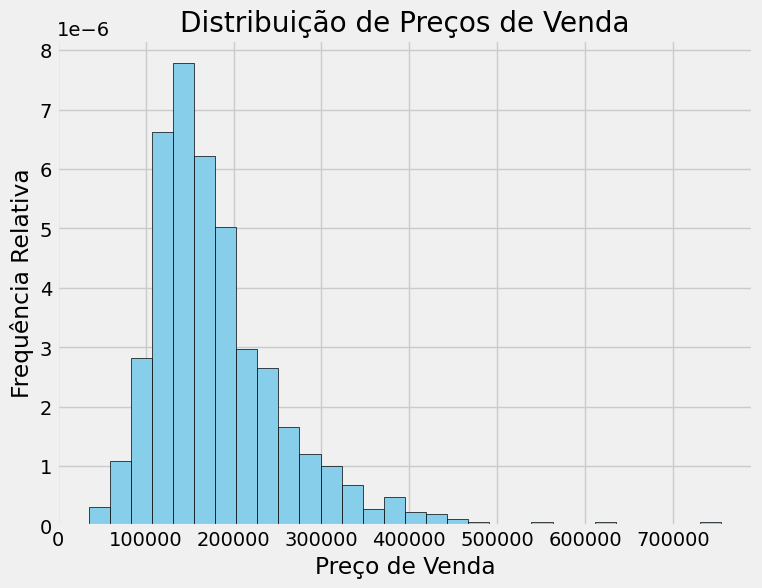

In [96]:
# Histograma dessa variável:

# Configurar o estilo e tamanho do gráfico
plt.figure(figsize=(8, 6))

# Criar o histograma em frequência relativa
plt.hist(house_data_train['SalePrice'], bins=30, density=True, color='skyblue', edgecolor='black')

# Adicionar título e rótulos aos eixos
plt.xlabel('Preço de Venda')
plt.ylabel('Frequência Relativa')
plt.title('Distribuição de Preços de Venda')

# Exibir o gráfico
plt.show()

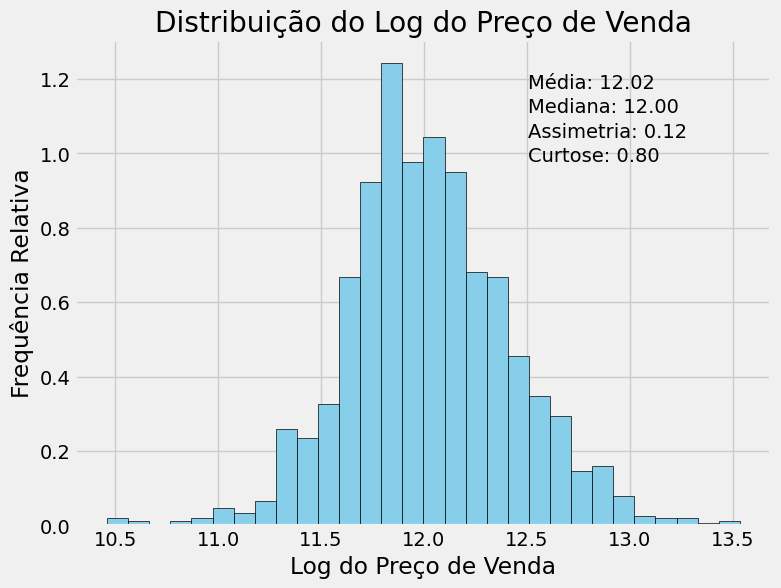

In [97]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Aplicar transformação logarítmica aos valores
log_sale_price = np.log(house_data_train['SalePrice'])

# Configurar o estilo e tamanho do gráfico
plt.figure(figsize=(8, 6))

# Criar o histograma em frequência relativa
plt.hist(log_sale_price, bins=30, density=True, color='skyblue', edgecolor='black')

# Calcular medidas estatísticas
mean = log_sale_price.mean()
median = np.median(log_sale_price)
skewness = stats.skew(log_sale_price)
kurtosis = stats.kurtosis(log_sale_price)

# Adicionar título e rótulos aos eixos
plt.xlabel('Log do Preço de Venda')
plt.ylabel('Frequência Relativa')
plt.title('Distribuição do Log do Preço de Venda')

# Adicionar informações sobre assimetria e curtose ao gráfico
plt.text(0.65, 0.9, f'Média: {mean:.2f}', transform=plt.gca().transAxes)
plt.text(0.65, 0.85, f'Mediana: {median:.2f}', transform=plt.gca().transAxes)
plt.text(0.65, 0.8, f'Assimetria: {skewness:.2f}', transform=plt.gca().transAxes)
plt.text(0.65, 0.75, f'Curtose: {kurtosis:.2f}', transform=plt.gca().transAxes)

# Exibir o gráfico
plt.show()


Com a nova distribuição com o log, podemos ver que a curtose e assimetria diminuíram. Agora a distribuição está mais próxima de uma normal e a utilizaremos na parte da modelagem. 

# Detectando Multicolinearidade entre variáveis numéricas utilizando mapa de calor

Ao observar o mapa de calor abaixo , dois padrões se destacam visualmente. O primeiro está relacionado às variáveis 'TotalBsmtSF' e '1stFlrSF', e o segundo às variáveis 'GarageX'. Esses padrões são representados por quadrados de vermelho intenso próximo a 1 de correlação, indicando uma forte correlação entre essas variáveis. No entanto, essa correlação intensa levanta a suspeita de que pode haver multicolinearidade entre elas.

Quando duas ou mais variáveis independentes estão altamente correlacionadas, pode ocorrer multicolinearidade, o que significa que essas variáveis estão fornecendo informações muito semelhantes e redundantes. Nesse caso, é importante considerar se ambas as variáveis são necessárias para o modelo ou se uma delas pode ser removida sem perder muita informação.

O mapa de calor é uma ferramenta útil para detectar a multicolinearidade, pois destaca visualmente as áreas de correlação intensa. Ao identificar esses padrões, podemos investigar mais a fundo e avaliar se é necessário tomar alguma ação, como remover uma das variáveis altamente correlacionadas, a fim de evitar problemas de multicolinearidade e melhorar a precisão do modelo.

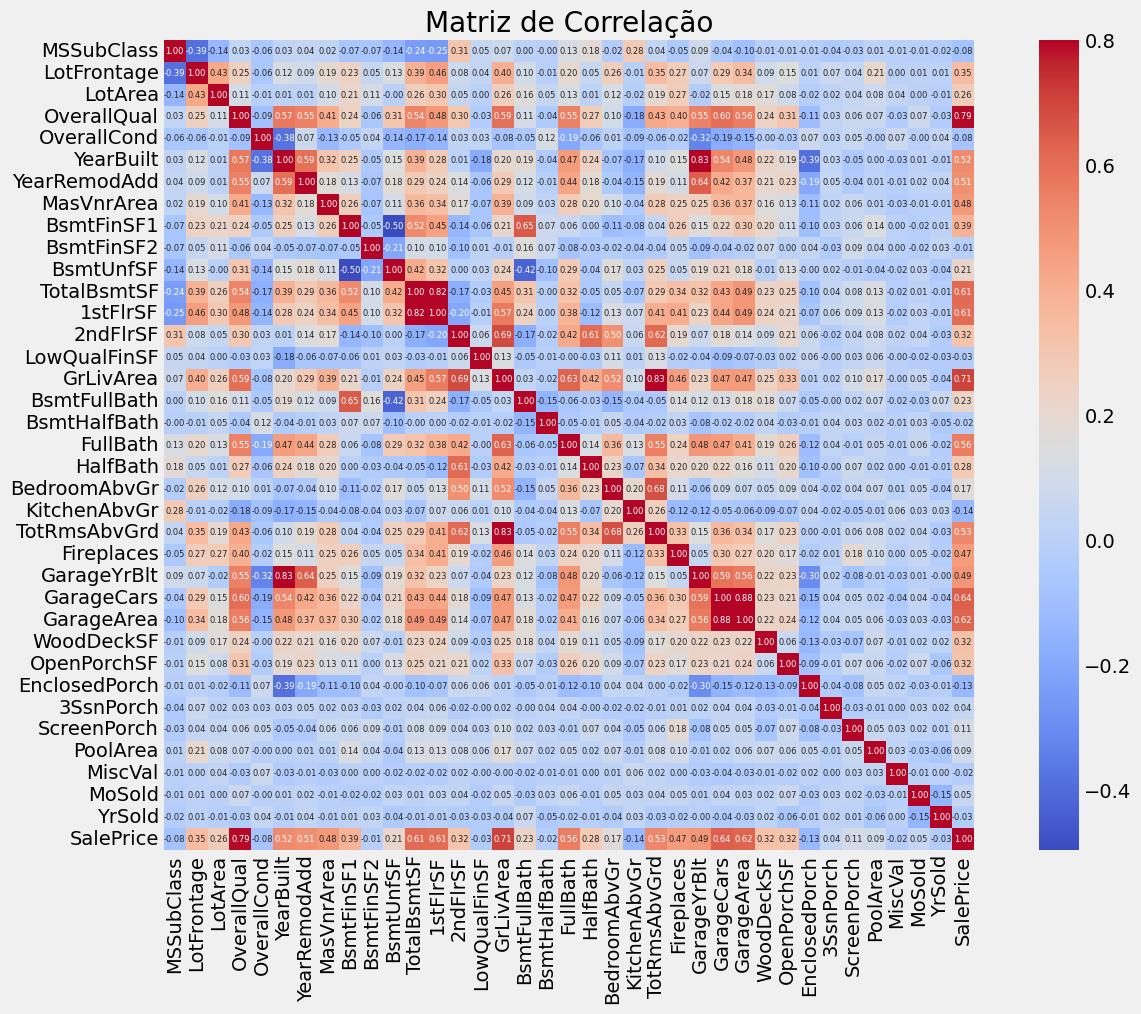

In [98]:
# Seleciona apenas as variáveis numéricas
numeric_columns = house_data_train.select_dtypes(include=['int64', 'float64']).columns
house_data_numeric = house_data_train[numeric_columns]

# Calcula a matriz de correlação com as variáveis numéricas
corrmat = house_data_numeric.corr()

# Plota o mapa de calor da matriz de correlação com paleta de cores "coolwarm"
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corrmat, annot=True, fmt=".2f", vmax=.8, square=True, cmap="coolwarm", annot_kws={"fontsize": 6})
plt.title("Matriz de Correlação")
plt.show()

No caso das variáveis 'TotalBsmtSF' e '1stFlrSF', ambas estão relacionadas ao espaço da casa. 'TotalBsmtSF' representa a área total do porão da casa, enquanto '1stFlrSF' representa a área do primeiro andar da casa. É comum que a área do primeiro andar esteja fortemente relacionada à área total do porão, uma vez que o tamanho do porão costuma ser um fator determinante na construção do primeiro andar. Portanto, é esperado que haja uma alta correlação entre essas variáveis, pois ambas estão relacionadas ao espaço habitável da casa. A correlação é de 0.88, quase 1. 

No caso das variáveis 'GarageX', onde 'X' representa um número (como 'GarageCars' e 'GarageArea'), ambas estão relacionadas à garagem da casa. 'GarageCars' representa o número de carros que a garagem pode abrigar, enquanto 'GarageArea' representa a área da garagem em pés quadrados. Novamente, é esperado que haja uma forte correlação entre essas variáveis, uma vez que a capacidade da garagem em abrigar carros está diretamente relacionada ao tamanho físico da garagem em termos de área. Portanto, é natural que haja uma alta correlação entre essas variáveis.

Além disso, também foi observada alta correlação entre o ano de construção da casa e o ano de construção da garagem, o que indica que a construção da garagem ocorreu provavelmente no mesmo período da casa. Outro par de características com alta correlação é a área total útil e o número de cômodos acima do solo, uma vez que quanto maior a área total útil, maior é o número de cômodos disponíveis. Da mesma forma, a área do primeiro andar e a área do porão apresentam alta correlação, pois, em geral, uma é uma consequência da outra.

Essas correlações entre pares de características sugerem que algumas variáveis podem fornecer informações redundantes ou duplicadas para a previsão do valor de venda. É importante levar em consideração essa multicolinearidade ao realizar análises e modelos de previsão, a fim de evitar problemas como instabilidade nos coeficientes de regressão e dificuldade em interpretar os efeitos individuais de cada variável.

A multicolinearidade pode tornar o modelo sensível a pequenas alterações nos dados de treinamento, resultando em previsões menos estáveis e menos generalizáveis para novos dados.Portanto, é importante lidar com a multicolinearidade para evitar esses problemas e obter previsões mais precisas e confiáveis. Isso pode ser feito por meio de técnicas como a exclusão de variáveis altamente correlacionadas, a combinação de variáveis relacionadas em uma única variável ou o uso de métodos de regularização, como a regressão Ridge ou Lasso.

# Analisando Sales Price com variáveis numéricas

O código abaixo  primeiro seleciona apenas as variáveis numéricas do DataFrame house_data_train. Em seguida, é calculada a matriz de correlação utilizando apenas essas variáveis numéricas. Os gráficos de dispersão são criados utilizando o DataFrame original house_data_train para visualizar a relação entre as variáveis numéricas mais correlacionadas a 'SalePrice'.

Ao selecionar as variáveis mais correlacionadas com "SalePrice", você traz mais objetividade à análise, focando nas variáveis que têm uma relação mais forte com a variável alvo. Isso pode ajudar a identificar quais variáveis estão mais intimamente relacionadas ao preço de venda e têm um potencial maior para explicar as variações nessa variável.

In [99]:
# Analisando as variáveis numéricas que tem maior correlação com Preço de venda
corrmat.drop(['OverallQual', 'GarageCars'])['SalePrice'].sort_values(ascending=False).head(5)

SalePrice      1.000000
GrLivArea      0.708624
GarageArea     0.623431
TotalBsmtSF    0.613581
1stFlrSF       0.605852
Name: SalePrice, dtype: float64

Aqui estão as variáveis numéricas mais correlacionadas com 'SalePrice' e uma breve descrição de cada uma:


1. **GrLivArea (Área acima do nível do solo)**: Representa a área de estar principal da casa acima do nível do solo em pés quadrados. É uma medida do tamanho total da área de convivência da casa. Casas com uma área de estar maior geralmente têm um preço de venda mais alto.

4. **GarageArea (Área da garagem em pés quadrados)**: Representa a área total da garagem em pés quadrados. Casas com uma área de garagem maior costumam ter mais espaço para estacionamento e armazenamento, o que pode influenciar positivamente o preço de venda.

5. **TotalBsmtSF (Área total do porão em pés quadrados)**: Indica a área total do porão em pés quadrados. Porões maiores oferecem mais espaço para armazenamento, áreas de lazer adicionais ou até mesmo a possibilidade de expansão futura da área habitável. Casas com uma área total do porão maior tendem a ter um preço de venda mais alto.

6. **1stFlrSF (Área do primeiro andar em pés quadrados)**: Representa a área do primeiro andar da casa em pés quadrados. Casas com um primeiro andar maior oferecem mais espaço para os principais ambientes de convivência, o que pode influenciar o preço de venda.

Essas variáveis representam características importantes que podem influenciar o preço de venda de uma casa. No entanto, é importante considerar outros fatores também ao realizar uma análise abrangente dos preços de venda.

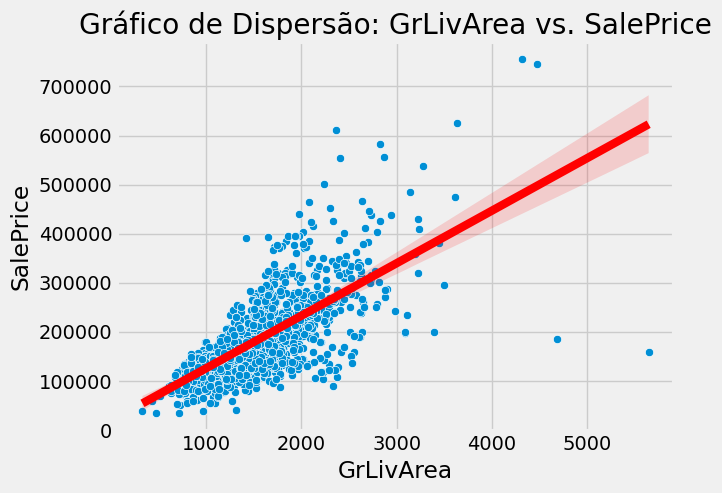

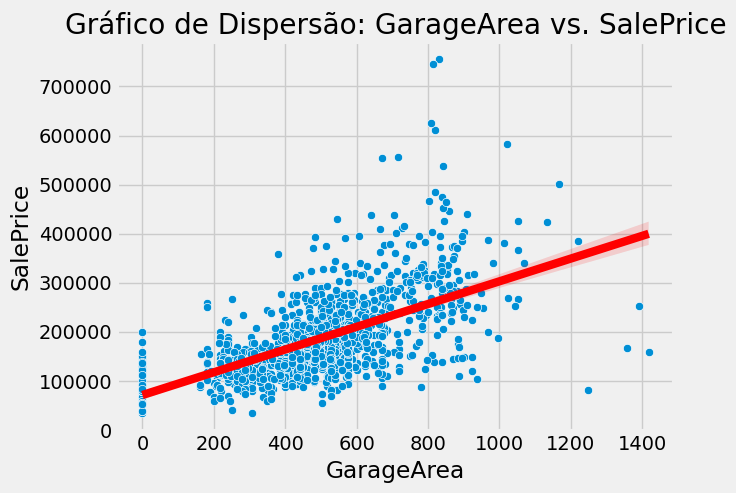

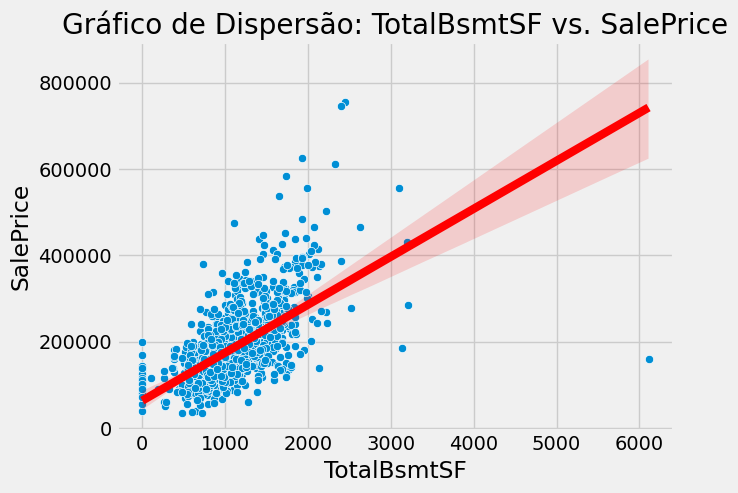

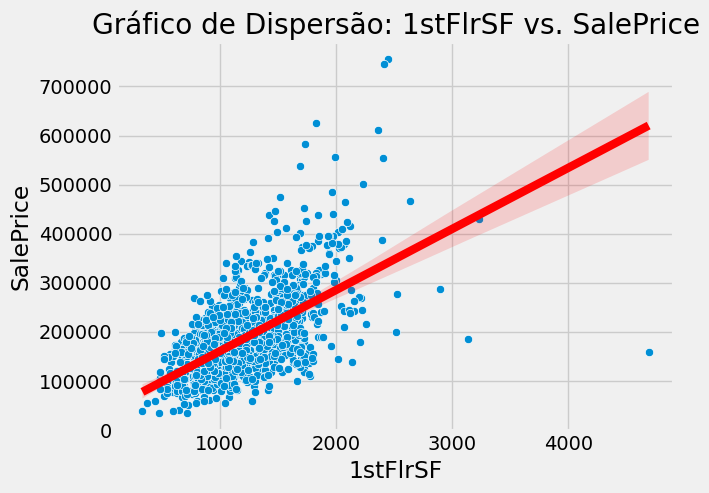

In [100]:
# Correlação entre variáveis numéricas e preço de venda

# Seleciona apenas as variáveis numéricas
numeric_columns = house_data_train.select_dtypes(include=['int64', 'float64']).columns
house_data_numeric = house_data_train[numeric_columns]

# Remove as variáveis categóricas 'OverallQual', 'GarageCars', 'FullBath' e 'TotRmsAbvGrd'
house_data_numeric = house_data_numeric.drop(['OverallQual', 'GarageCars', 'FullBath', 'TotRmsAbvGrd'], axis=1)

# Calcula a matriz de correlação com 'SalePrice'
correlation_matrix = house_data_numeric.corr()
corr_with_saleprice = correlation_matrix['SalePrice'].sort_values(ascending=False)

# Filtra as variáveis mais correlacionadas com 'SalePrice'
top_corr_vars = corr_with_saleprice[corr_with_saleprice > 0.6]
top_corr_vars = top_corr_vars.drop('SalePrice')  # Remove 'SalePrice' da lista

# Cria os gráficos de dispersão com linha de regressão
for var in top_corr_vars.index:
    sns.scatterplot(x=var, y='SalePrice', data=house_data_train)
    sns.regplot(x=var, y='SalePrice', data=house_data_train, scatter=False, color='red')
    plt.title(f"Gráfico de Dispersão: {var} vs. SalePrice")
    plt.xlabel(var)
    plt.ylabel('SalePrice')
    plt.show()



Como esperado,  o preço de venda possui relação aproximadamente linear com a área útil total acima do nível do solo (GrLivArea), mas com considerável heteroscedasticidade. Também podemos observar alguns outliers, valores acima de 4000 pés. A área da garagem também, aparentemente, possui uma relação linear positiva com o preço de venda da casa. A área do porão, em metros quadrados, também possui relação positiva com o preço da casa, o que é esperado. Maior área da casa com maior preço da casa. E a área do primeiro pé em metros quadrados também possui uma relação linear com o preço da casa. 

É interessante notar a multicolinearidade quase perfeita de área do porão com área do primeiro piso, o que faz sentido, uma vez que a área do porão depende do tamanho do primeiro piso. 

__Analisando outras variáveis numéricas__

Analisando área da piscina e área do lote. 

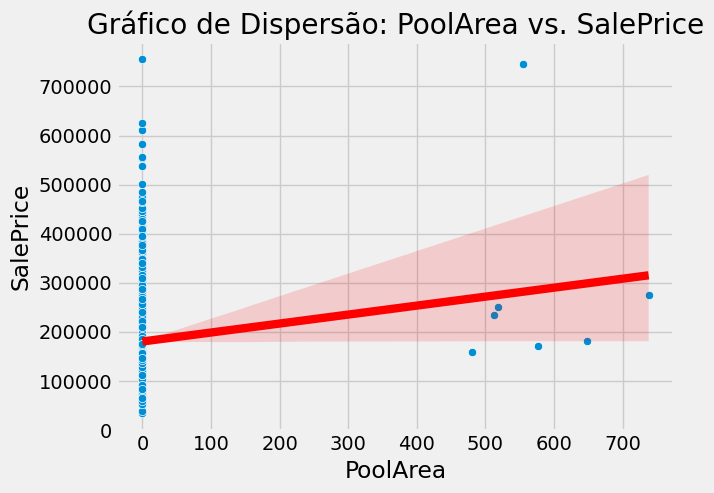

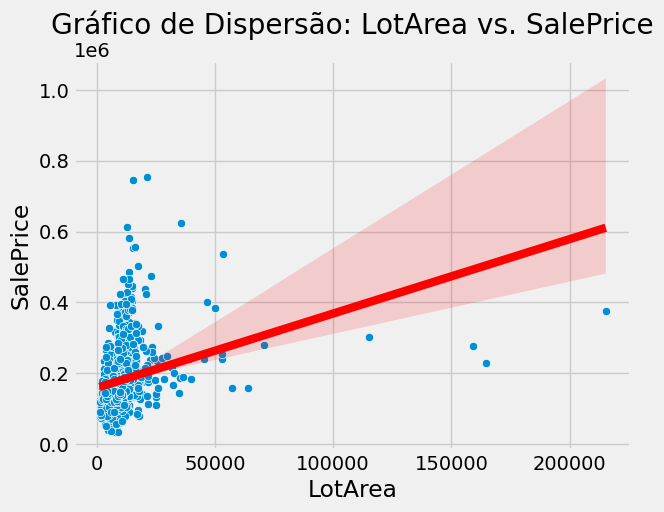

In [101]:
# Seleciona apenas as variáveis numéricas área da piscina e área do lote
house_data_numeric_2 = house_data_train[['PoolArea','LotArea']]

# Calcula a matriz de correlação com 'SalePrice'
correlation_matrix = house_data_numeric_2.corr()

for var in house_data_numeric_2.columns:
    sns.scatterplot(x=var, y='SalePrice', data=house_data_train)
    sns.regplot(x=var, y='SalePrice', data=house_data_train, scatter=False, color='red')
    plt.title(f"Gráfico de Dispersão: {var} vs. SalePrice")
    plt.xlabel(var)
    plt.ylabel('SalePrice')
    plt.show()

Os moradores dessa cidade não parecem ser muito fãns de piscina...

# Analisando Sales Price com variáveis categóricas

Nessa etapa, escolhi de forma intuitiva algumas variáveis que na minha cabeça fazem sentido e que afetam o preço do imóvel. 

In [102]:
# Variáveis categóricas no conjunto de dados

house_data_train.select_dtypes(include=['object']).columns



Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

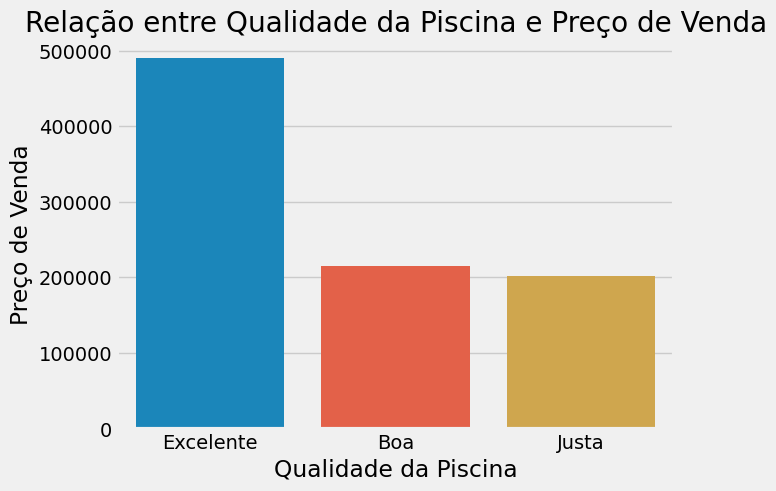

In [103]:
sns.barplot(x='PoolQC', y='SalePrice', data=house_data_train, ci=None)
plt.title('Relação entre Qualidade da Piscina e Preço de Venda')
plt.xlabel('Qualidade da Piscina')
plt.ylabel('Preço de Venda')

# Define os rótulos personalizados para as categorias de PoolQC
plt.xticks([0, 1, 2], ['Excelente', 'Boa', 'Justa'])

plt.show()


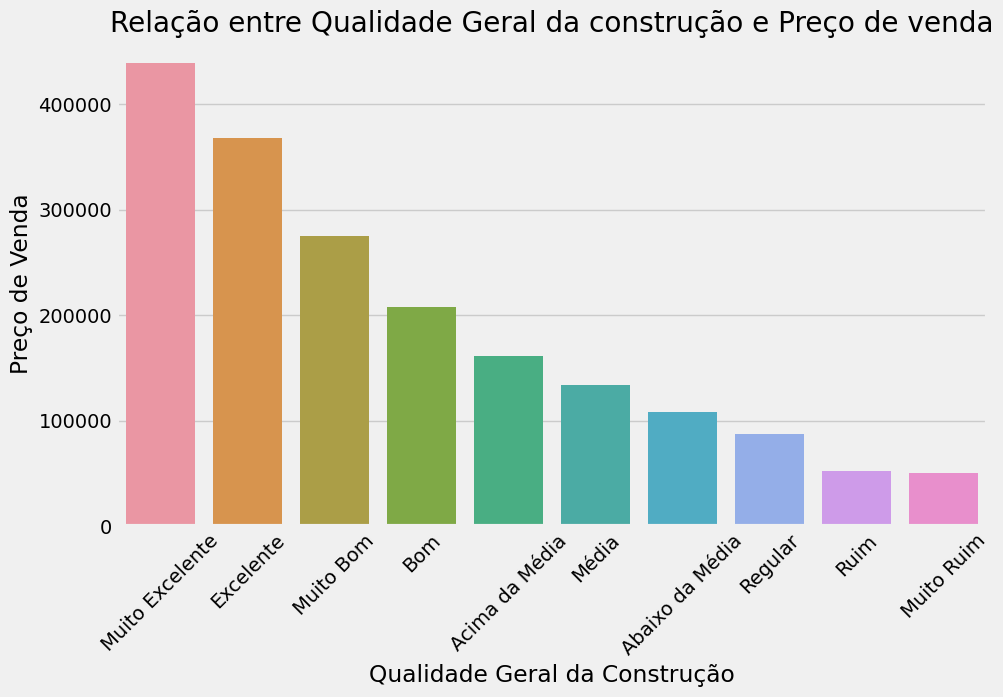

In [104]:
# Mapeamento das categorias 'OverallQual' para nomes descritivos
qual_mapping = {
    10: 'Muito Excelente',
    9: 'Excelente',
    8: 'Muito Bom',
    7: 'Bom',
    6: 'Acima da Média',
    5: 'Média',
    4: 'Abaixo da Média',
    3: 'Regular',
    2: 'Ruim',
    1: 'Muito Ruim'
}

# Cria um DataFrame contendo as colunas 'OverallQual' e 'SalePrice'
data = pd.DataFrame({'OverallQual': house_data_train['OverallQual'], 'SalePrice': house_data_train['SalePrice']})

# Mapeia os valores de 'OverallQual' para as categorias descritivas
data['OverallQual'] = data['OverallQual'].map(qual_mapping)

# Cria o gráfico de barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='OverallQual', y='SalePrice', data=data, order=list(qual_mapping.values()), ci=None)
plt.title('Relação entre Qualidade Geral da construção e Preço de venda')
plt.xlabel('Qualidade Geral da Construção')
plt.ylabel('Preço de Venda')
plt.xticks(rotation=45)
plt.show()



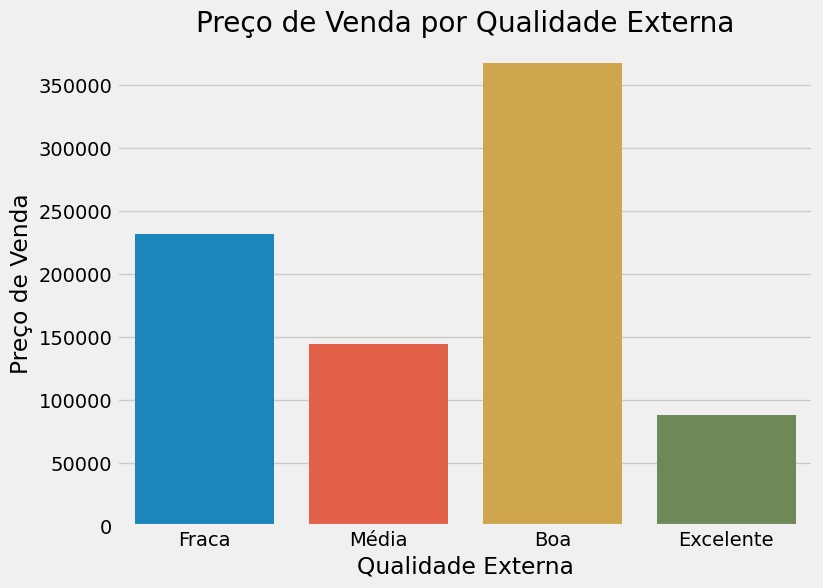

In [105]:
plt.figure(figsize=(8, 6))
sns.barplot(x='ExterQual', y='SalePrice', data=house_data_train, ci=None)
plt.title('Preço de Venda por Qualidade Externa')
plt.xlabel('Qualidade Externa')
plt.ylabel('Preço de Venda')
plt.xticks([0, 1, 2, 3], ['Fraca', 'Média', 'Boa', 'Excelente'])
plt.show()



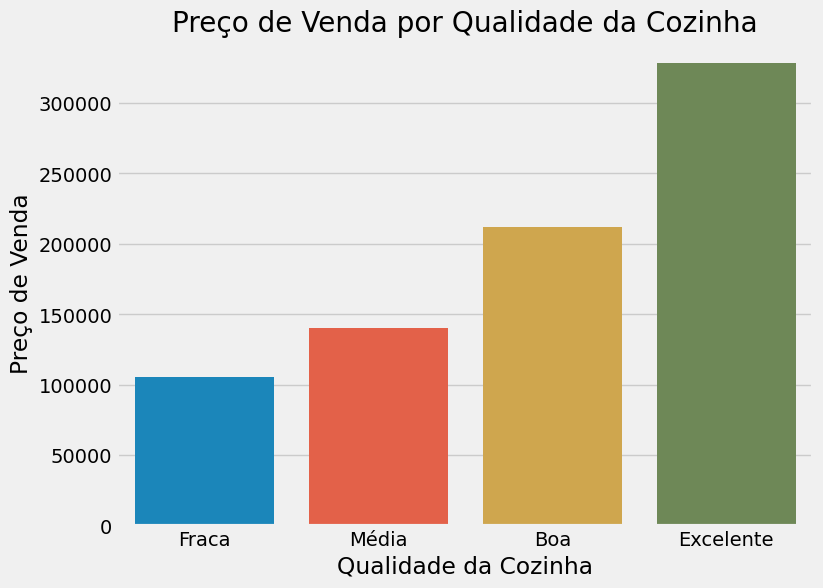

In [106]:
plt.figure(figsize=(8, 6))
sns.barplot(x='KitchenQual', y='SalePrice', data=house_data_train,
            order=['Fa', 'TA', 'Gd', 'Ex'], ci=None)
plt.title('Preço de Venda por Qualidade da Cozinha')
plt.xlabel('Qualidade da Cozinha')
plt.ylabel('Preço de Venda')
plt.xticks([0, 1, 2, 3], ['Fraca', 'Média', 'Boa', 'Excelente'])
plt.show()



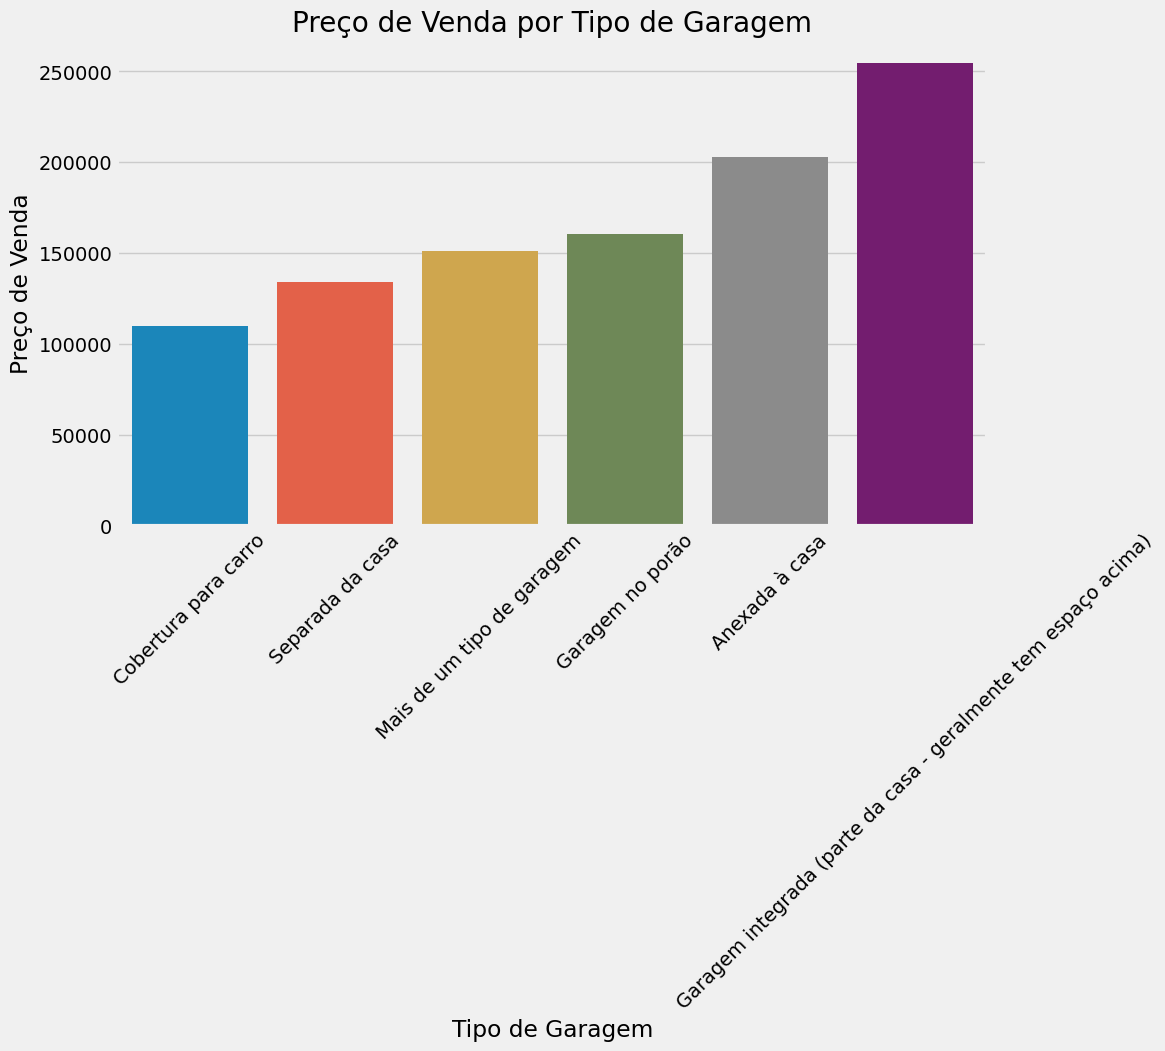

In [107]:
# Dicionário de tradução
traducao_garage = {
    '2Types': 'Mais de um tipo de garagem',
    'Attchd': 'Anexada à casa',
    'Basment': 'Garagem no porão',
    'BuiltIn': 'Garagem integrada (parte da casa - geralmente tem espaço acima)',
    'CarPort': 'Cobertura para carro',
    'Detchd': 'Separada da casa',
    'NA': 'Sem garagem'
}

# Substituindo os valores pela tradução
house_data_train['GarageType'] = house_data_train['GarageType'].map(traducao_garage)

plt.figure(figsize=(10, 6))
sns.barplot(x='GarageType', y='SalePrice', data=house_data_train,
            order=house_data_train.groupby('GarageType')['SalePrice'].mean().sort_values().index, ci=None)
plt.title('Preço de Venda por Tipo de Garagem')
plt.xlabel('Tipo de Garagem')
plt.ylabel('Preço de Venda')
plt.xticks(rotation=45)

plt.show()


Podemos perceber algumas características interessantes. A qualidade geral da piscina importa, mas temos poucos dados. A qualidade geral da construção também é um fator importante e o tipo de garagem também, o que chama a atenção. Garagem no porão é melhor que garagem fora da casa pois ocupa menos espaço do lote? 

__Para os features relacionados a datas:__

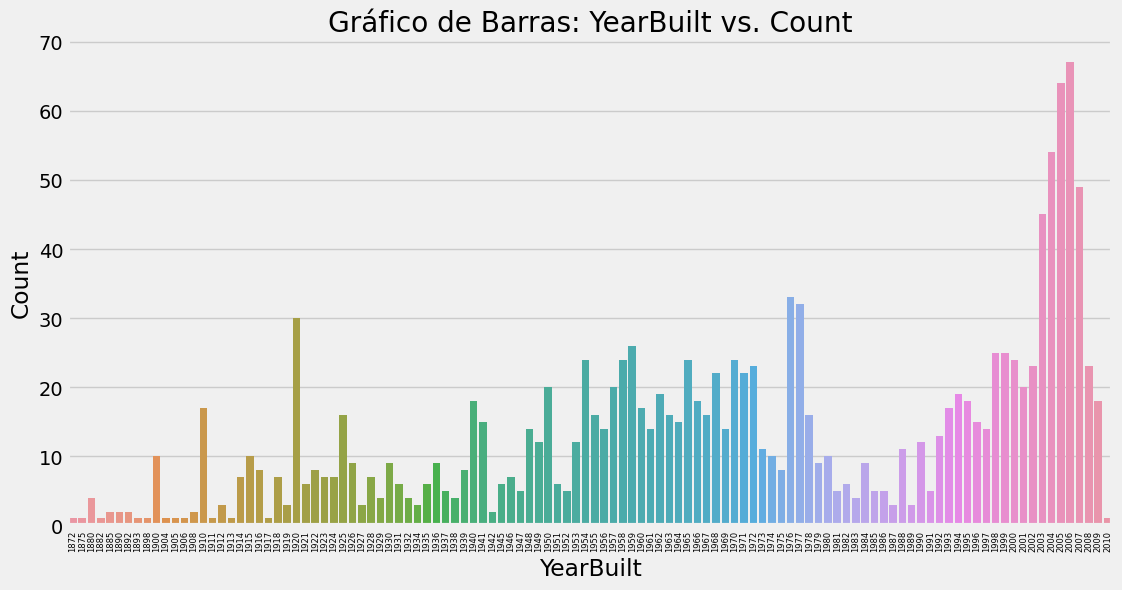

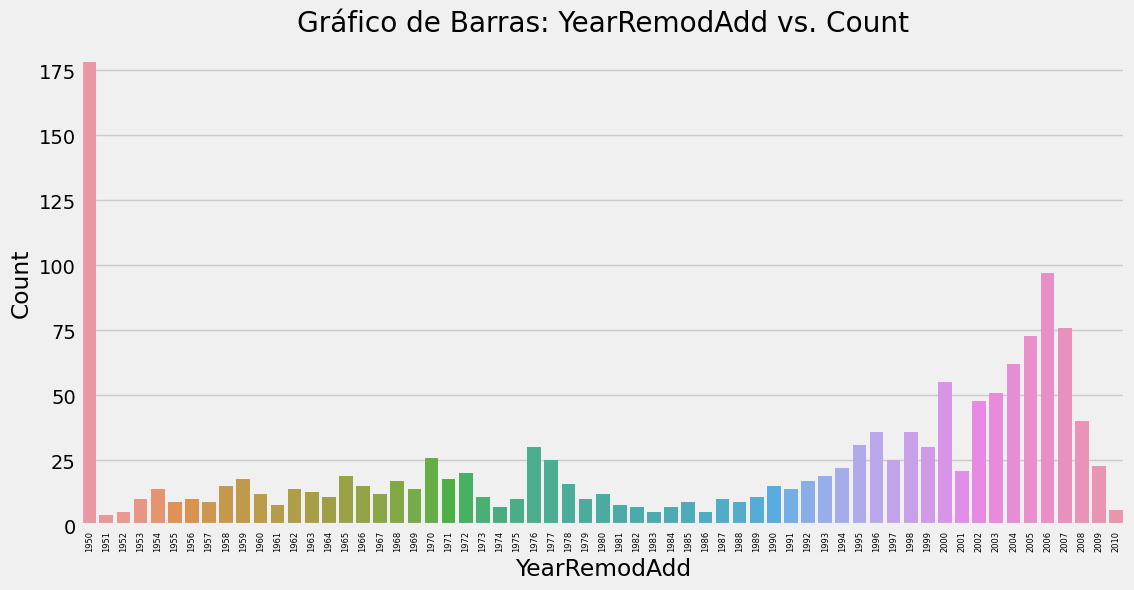

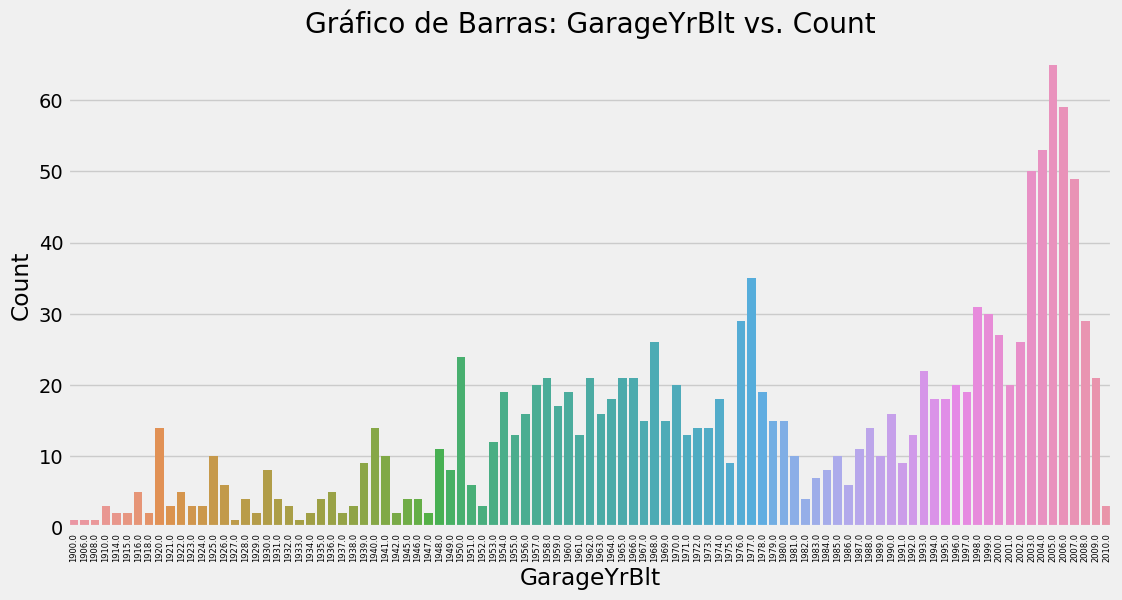

In [108]:
date_features = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']

for feature in date_features:
    if feature == 'GarageYrBlt':
        filtered_data = house_data_train.dropna(subset=[feature])  # Filtrar dados removendo NA (ausentes)
    else:
        filtered_data = house_data_train
    
    plt.figure(figsize=(12, 6))  # Definir o tamanho da figura

    sns.countplot(x=feature, data=filtered_data)
    plt.title(f"Gráfico de Barras: {feature} vs. Count")
    plt.xlabel(feature)
    plt.ylabel('Count')

    # Definir rótulos personalizados para o eixo x
    x_labels = filtered_data[feature].unique()
    x_labels.sort()
    plt.xticks(range(len(x_labels)), x_labels, rotation=90, fontsize=6)

    plt.show()

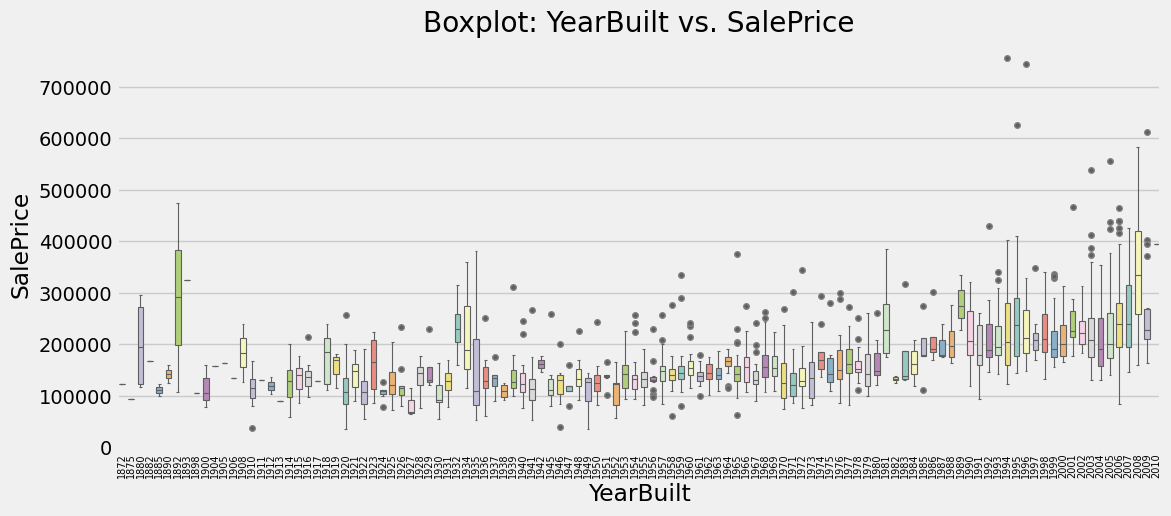

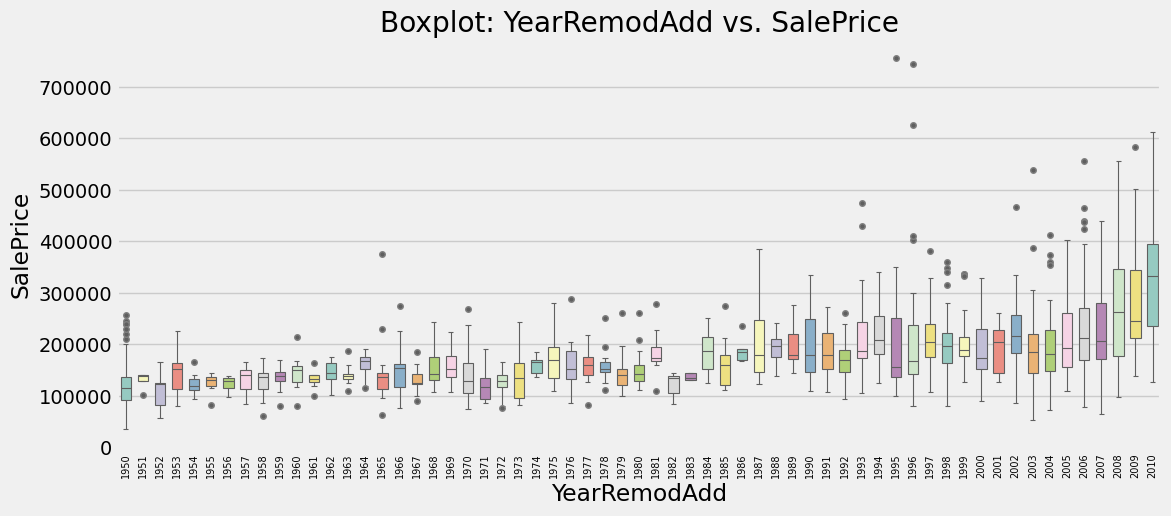

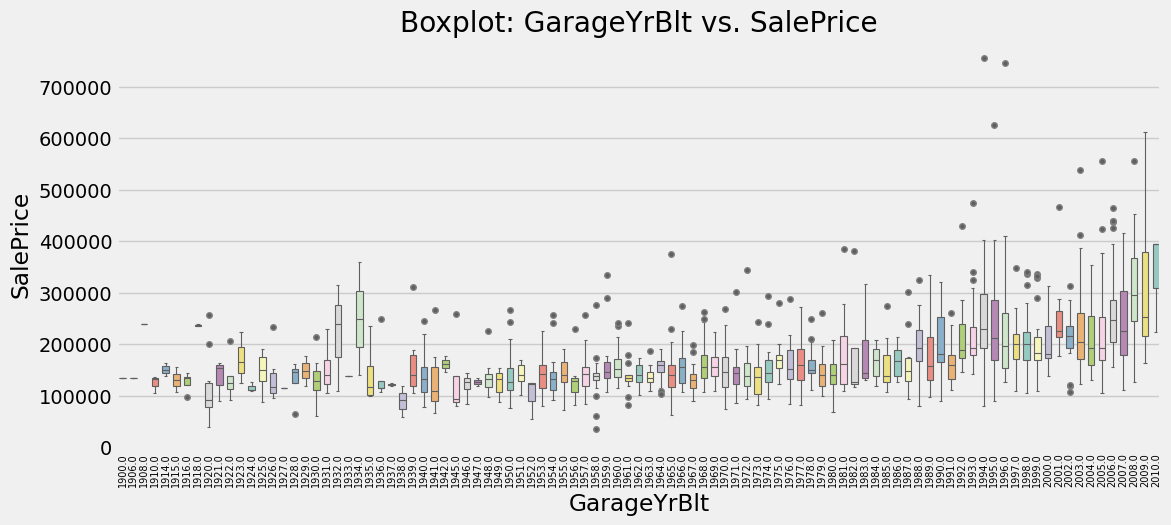

In [109]:
for feature in date_features:
    if feature == 'GarageYrBlt':
        filtered_data = house_data_train.dropna(subset=[feature])  # Filtrar dados removendo NA (ausentes)
    else:
        filtered_data = house_data_train
    
    plt.figure(figsize=(12, 6))  # Definir o tamanho da figura

    sns.boxplot(x=feature, y='SalePrice', data=filtered_data, palette='Set3',
                width=0.6, linewidth=0.8, flierprops={'marker': 'o', 'markersize': 4, 'markeredgecolor': 'gray'})

    plt.title(f"Boxplot: {feature} vs. SalePrice")
    plt.xlabel(feature)
    plt.ylabel('SalePrice')

    plt.xticks(rotation=90, fontsize=7)
    plt.subplots_adjust(bottom=0.2)  # Ajustar o espaçamento entre os boxplots

    plt.show()

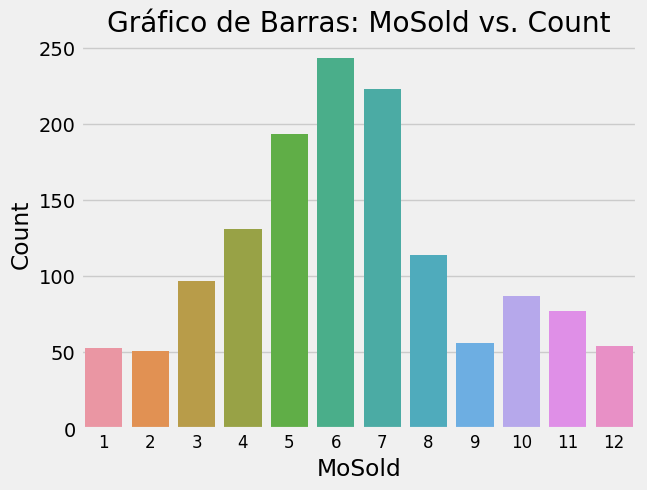

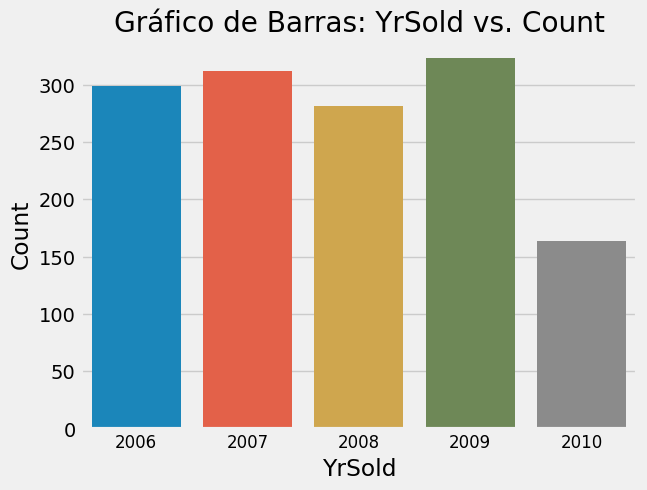

In [110]:
date_features_2 = ['MoSold', 'YrSold']

for feature in date_features_2:
    
    sns.countplot(x=feature, data=filtered_data)
    plt.title(f"Gráfico de Barras: {feature} vs. Count")
    plt.xlabel(feature)
    plt.ylabel('Count')

    # Definir rótulos personalizados para o eixo x
    x_labels = filtered_data[feature].unique()
    x_labels.sort()
    plt.xticks(range(len(x_labels)), x_labels, fontsize=12)

    plt.show()

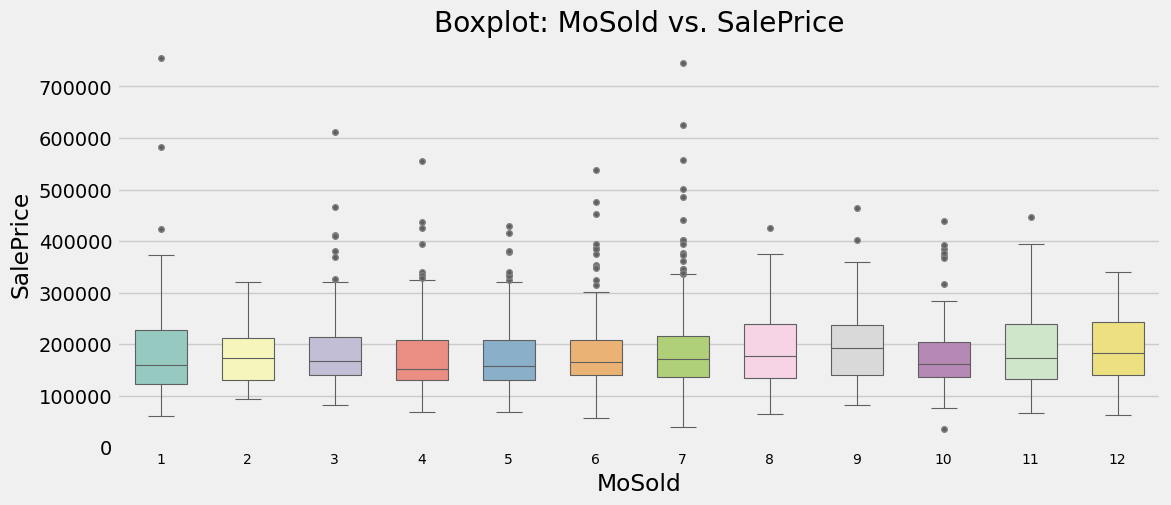

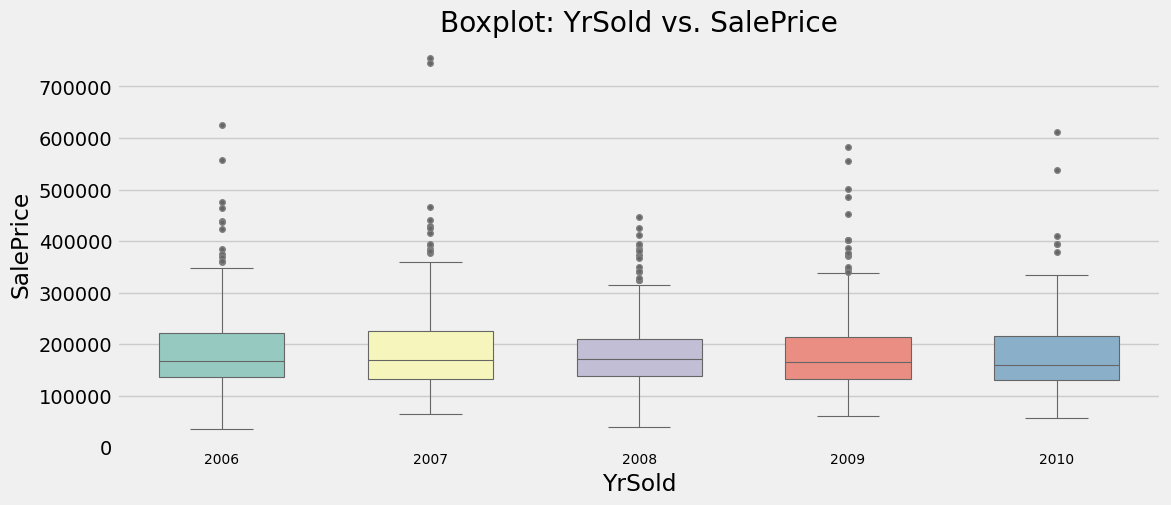

In [111]:
for feature in date_features_2:
    plt.figure(figsize=(12, 6))  # Definir o tamanho da figura

    sns.boxplot(x=feature, y='SalePrice', data=filtered_data, palette='Set3',
                width=0.6, linewidth=0.8, flierprops={'marker': 'o', 'markersize': 4, 'markeredgecolor': 'gray'})

    plt.title(f"Boxplot: {feature} vs. SalePrice")
    plt.xlabel(feature)
    plt.ylabel('SalePrice')

    plt.xticks(fontsize=10)
    plt.subplots_adjust(bottom=0.2)  # Ajustar o espaçamento entre os boxplots

    plt.show()

- É observado um padrão em que construções mais recentes geralmente apresentam um preço de venda mais elevado, o que está em linha com as expectativas.

- Não foram identificadas evidências significativas de que o ano de venda tenha uma influência significativa no preço de venda.

- É possível observar que o mercado imobiliário tende a ser mais aquecido durante o verão americano.

- Existe uma relação consistente em que construções mais recentes tendem a ter um preço de venda médio mais alto, o que é um resultado esperado.